In [1]:
import pandas as pd

dfp = pd.read_excel(r"C:\Users\lieve\Documents\School\2024 - 2025\Semester 2\Modern Data Analytics [G0Z39a]\Project\cordis-HORIZONprojects-xlsx\project.xlsx")
dfo = pd.read_excel(r"C:\Users\lieve\Documents\School\2024 - 2025\Semester 2\Modern Data Analytics [G0Z39a]\Project\organization.xlsx")
dfoutput = pd.read_excel(r"C:\Users\lieve\Documents\School\2024 - 2025\Semester 2\Modern Data Analytics [G0Z39a]\Project\project_output.xlsx")

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
# One to one merge dfp and df_full_output
newdf = dfp.merge(dfoutput, on="id")
### One to many merge newdf and dfo, excpect 100249 rows in fulldf
fulldf = newdf.merge(dfo, left_on="id", right_on="projectID", validate="one_to_many")

In [3]:
print(fulldf.info())
# Delete active and nature (empty)
fulldf = fulldf.drop(columns=["active", "nature"])
# Drop col's based on initial exploration (old exploration files)
fulldf = fulldf.drop(columns=["acronym", "title", "totalCost_x", "topics", "objective_x", "rcn_x", "grantDoi", "contentUpdateDate_x", \
                              "projectID", "projectAcronym", "organisationID", "vatNumber", "name", "shortName", "street", "postCode", \
                              "city", "geolocation", "organizationURL", "contactForm","contentUpdateDate_y", "rcn_y", "totalCost_y", \
                              "ecContribution", "netEcContribution", "ecSignatureDate", \
                              "masterCall", "subCall", "frameworkProgramme", "status"
                            ])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100249 entries, 0 to 100248
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100249 non-null  int64  
 1   acronym              100249 non-null  object 
 2   status               100249 non-null  object 
 3   title                100249 non-null  object 
 4   startDate            100249 non-null  object 
 5   endDate              100249 non-null  object 
 6   totalCost_x          100249 non-null  object 
 7   ecMaxContribution    100249 non-null  object 
 8   legalBasis           100249 non-null  object 
 9   topics               100249 non-null  object 
 10  ecSignatureDate      100231 non-null  object 
 11  frameworkProgramme   100249 non-null  object 
 12  masterCall           100249 non-null  object 
 13  subCall              100249 non-null  object 
 14  fundingScheme        100248 non-null  object 
 15  nature           

In [4]:
# Give right structure to funding variable
fulldf["ecMaxContribution"] = fulldf["ecMaxContribution"].str.replace(',', '.', regex=False).astype(float)
# Give 0/1 to MSE, assuming missing MSE means not MSE
fulldf["SME"] = fulldf["SME"].astype(bool)
fulldf["SME"] = fulldf["SME"].astype(int)
# Convert start and end date to datetime
fulldf["startDate"] = pd.to_datetime(fulldf["startDate"])
fulldf["endDate"] = pd.to_datetime(fulldf["endDate"])

In [5]:
# Check missings for self made col's. Still missings for 3 projects (even after correction scientific domain, see old exploration files)
# These are the projects with id 101149703, 101101973 and 101041246
# Manually changed NA country (Namibia) to NAM such that python does not interpret it as a missing value (see old exploration files)
# For other missings countries, we mannualy changed them to the right country code by manually filling in based on city or organisation name (see old exploration files)
import missingno as msno
sorted_NAs = msno.nullity_sort(fulldf, sort='ascending')
print(sorted_NAs.head(100))
fulldf_C = fulldf[~fulldf["id"].isin([101149703, 101101973, 101041246])]

# Check for missings self made col's after removal of 3 projects
## List of all projects than above with a missing scientific_domain
missing_scientific_domain = fulldf_C[fulldf_C["scientific_domain"].isna()]
print("Project IDs with missing scientific_domain:", missing_scientific_domain["id"].unique())
## Main topics
missing_main_topics = fulldf_C[fulldf_C["main_topics"].isna()]
print("Project IDs with missing main_topics:", missing_main_topics["id"].unique())
## Expected impact
missing_expected_impact = fulldf_C[fulldf_C["expected_impact"].isna()]
print("Project IDs with missing expected_impact:", missing_expected_impact["id"].unique())
## Sustainability
missing_sustainability = fulldf_C[fulldf_C["sustainability"].isna()]
print("Project IDs with missing sustainability:", missing_sustainability["id"].unique())
## Problem type
missing_problem_type = fulldf_C[fulldf_C["problem_type"].isna()]
print("Project IDs with missing problem_type:", missing_problem_type["id"].unique())

# Spotted missing on fundingscheme (used as a feature in the model), looks like belonging to a EURATOM scheme but don't know which one
# -> left it out 
missing_funding_scheme = fulldf_C[fulldf_C["fundingScheme"].isna()]
print("Project IDs with missing fundingScheme:", missing_funding_scheme["id"].unique())
fulldf_C = fulldf_C[fulldf_C["fundingScheme"].notna()]
missing_funding_scheme_after = fulldf_C[fulldf_C["fundingScheme"].isna()]
print("Project IDs with missing fundingScheme after removal:", missing_funding_scheme_after["id"].unique())

# Control for missings on country after manual adaption, no missings left
missing_scientific_domain = fulldf_C[fulldf_C["country"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

              id  startDate    endDate  ecMaxContribution   legalBasis  \
46924  101149703 2024-09-01 2026-08-31          195914.88  HORIZON.1.2   
80782  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
80783  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
80760  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
80762  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
...          ...        ...        ...                ...          ...   
2825   101178074 2024-11-01 2028-10-31        11939105.26  HORIZON.2.4   
3327   101178170 2025-01-01 2027-12-31         2972396.25  HORIZON.2.2   
3337   101178170 2025-01-01 2027-12-31         2972396.25  HORIZON.2.2   
3616   101177556 2025-01-01 2027-12-31         3944966.79  HORIZON.2.2   
3992   101135795 2023-12-01 2026-11-30         4421800.00  HORIZON.2.4   

                fundingScheme  \
46924  HORIZON-TMA-MSCA-PF-EF   
80782           HORIZON-JU-IA   
80783       

In [6]:
# Feature engineering based on project and organization datasets of the CORDIS database

fulldf = fulldf_C.copy()
fulldf = fulldf.reset_index(drop=True)
## Made feature expected duration project in days
import datetime
fulldf["startDate"] = fulldf["startDate"].astype("object")
fulldf["endDate"] = fulldf["endDate"].astype("object")
lengths = []
for i in range(len(fulldf)):
    start_date = fulldf.loc[i, "startDate"]
    end_date = fulldf.loc[i, "endDate"]
    
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    if isinstance(end_date, str):
        end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    
    length = (end_date - start_date).days
    lengths.append(length)

fulldf["project_length_days"] = lengths


## Feature; number of organizations per project
fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')

## Feature; proportion of SMEs per project
fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')
fulldf['proportion_of_small_and_medium_orgs'] = fulldf['number_of_small_and_medium_orgs'] / fulldf['number_of_organizations']

## Drop columns that are not needed anymore
fulldf = fulldf.drop(columns=["SME", "nutsCode", "activityType", "endOfParticipation", "order", "role", "number_of_small_and_medium_orgs"])


In [7]:
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer

# MultiLabelBinarizer for main_topics with grouping
mlb_topics = MultiLabelBinarizer(sparse_output=True)
fulldf['main_topics'] = fulldf['main_topics'].astype('object')
fulldf['main_topics'] = fulldf['main_topics'].apply(
    lambda x: [str(i).lower() for i in (literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)]
    if isinstance(x, (str, list)) else []
)

# Calculate frequency of each topic
all_topics = [topic for sublist in fulldf['main_topics'] for topic in sublist]
topic_counts = pd.Series(all_topics).value_counts()
total_count = len(all_topics)

In [8]:
topics = topic_counts.index.tolist()

In [9]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
from itertools import combinations

# 1. Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Generate embeddings for each column title
embeddings = model.encode(topics, convert_to_tensor=True)

# 3. Calculate cosine similarity between all pairs of embeddings
similarity_matrix = util.cos_sim(embeddings, embeddings).cpu().numpy() # Convert to NumPy for easier indexing

# Optional: Convert to DataFrame for better readability
similarity_df_display = pd.DataFrame(similarity_matrix, index=topics, columns=topics)
print("Cosine Similarity Matrix (first 5x5 for brevity):")
print(similarity_df_display.iloc[:5,:5].round(2))
print("-" * 50)

# 4. Identify highly similar pairs and group them
similarity_threshold = 0.50 # Adjust this based on your needs

# A list to store the final groups of similar topics
merged_topic_groups = []
# Keep track of topics that have already been assigned to a group
processed_topics = set()

# Iterate through all topics to form groups
for i, current_topic in enumerate(topics):
    if current_topic in processed_topics:
        continue # Skip if this topic has already been grouped

    current_group = [current_topic] # Start a new group with the current topic
    processed_topics.add(current_topic)

    for j, other_topic in enumerate(topics):
        if i == j or other_topic in processed_topics:
            continue # Skip self-comparison and already processed topics

        if similarity_matrix[i, j] >= similarity_threshold:
            current_group.append(other_topic)
            processed_topics.add(other_topic) # Add the newly found similar topic to processed

    # Only add groups with more than one topic, or single topics if you want to explicitly list all
    if len(current_group) > 1: # Only add if a merge is actually needed
        merged_topic_groups.append(current_group)
    else: # Add single topics if you want the CSV to contain ALL topics, grouped or not
        # This is useful if you want to ensure all topics are accounted for in your "library"
        if current_topic not in {t for group in merged_topic_groups for t in group}: # Ensure not already added
            merged_topic_groups.append(current_topic)


print(f"\nIdentified Topic Groups (Similarity >= {similarity_threshold}):")
for group in merged_topic_groups:
    print(f"- {group}")

#### Outputting to CSV
# Create a DataFrame to hold the grouped topics
# Find the maximum number of topics in any group to determine column count
max_group_size = 0
for group in merged_topic_groups:
    if isinstance(group, list): # Check if it's a list (a group)
        max_group_size = max(max_group_size, len(group))
    else: # It's a single topic (string)
        max_group_size = max(max_group_size, 1)

# Prepare data for DataFrame: each row is a list of topics in a group, padded with None
csv_data = []
for group in merged_topic_groups:
    row = []
    if isinstance(group, list):
        row = group + [None] * (max_group_size - len(group))
    else: # It's a single topic
        row = [group] + [None] * (max_group_size - 1)
    csv_data.append(row)

# Define column names
column_names = [f'Topic_{i+1}' for i in range(max_group_size)]

# Create the DataFrame
df_merge_library = pd.DataFrame(csv_data, columns=column_names)

# Add a 'Canonical_Name' column (optional, but highly recommended)
# You could decide the canonical name based on:
# 1. The first topic in the group (simple)
# 2. A more descriptive name you manually assign later
# 3. The shortest/longest topic in the group
df_merge_library['Canonical_Name'] = df_merge_library['Topic_1'] # Simple approach: use the first topic in the group

# Reorder columns to put Canonical_Name first
df_merge_library = df_merge_library[['Canonical_Name'] + [col for col in df_merge_library.columns if col != 'Canonical_Name']]

print("\nMerging Library DataFrame:")
print(df_merge_library)

# Save to CSV
csv_file_path = "topic_merging_library5.csv"
df_merge_library.to_csv(csv_file_path, index=False)
print(f"\nMerging library saved to '{csv_file_path}'")

Cosine Similarity Matrix (first 5x5 for brevity):
                         sustainability  artificial intelligence    ai  \
sustainability                     1.00                     0.20  0.24   
artificial intelligence            0.20                     1.00  0.79   
ai                                 0.24                     0.79  1.00   
machine learning                   0.18                     0.70  0.55   
circular economy                   0.34                     0.14  0.18   

                         machine learning  circular economy  
sustainability                       0.18              0.34  
artificial intelligence              0.70              0.14  
ai                                   0.55              0.18  
machine learning                     1.00              0.16  
circular economy                     0.16              1.00  
--------------------------------------------------

Identified Topic Groups (Similarity >= 0.5):
- ['sustainability', 'recycling', 'b

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from ast import literal_eval
from collections import defaultdict
import joblib
import scipy.sparse as sp

print("--- Original fulldf (before initial topic preprocessing) ---")
print(fulldf.head())
print("-" * 50)

# --- MultiLabelBinarizer with your specified preprocessing ---

# Ensure 'main_topics' is object type for literal_eval and list manipulation
fulldf['main_topics'] = fulldf['main_topics'].astype('object')

# Safely evaluate string representations of lists and clean topics
def preprocess_topics_list(topic_list):
    if isinstance(topic_list, str):
        try:
            evaluated_list = literal_eval(topic_list)
            if isinstance(evaluated_list, list):
                return [str(i).lower() for i in evaluated_list]
            else:
                return []
        except (ValueError, SyntaxError):
            return []
    elif isinstance(topic_list, list):
        return [str(i).lower() for i in topic_list]
    return []

fulldf['main_topics'] = fulldf['main_topics'].apply(preprocess_topics_list)

# Fit MLB on ALL original topics first to get all classes
mlb_topics = MultiLabelBinarizer(sparse_output=True)
topic_labels_matrix = mlb_topics.fit_transform(fulldf['main_topics'])

# Map original MLB classes to cleaned column names
original_mlb_cleaned_names = [
    f'topic_{label.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").lower()}'
    for label in mlb_topics.classes_
]
original_name_to_idx_map = {name: i for i, name in enumerate(original_mlb_cleaned_names)}

print(f"\n--- Initial MLB Topics: {len(original_mlb_cleaned_names)} unique topics before any merges. ---")

print("\n--- COMBINED OPTIMIZATION: Merging MLB exact duplicates and LLM-driven merges ---")

# Step 1: Create a final mapping for each *original* topic column to its *new* canonical name.
# This accounts for both exact duplicates and LLM-driven merges.

# Initialize the mapping. Each original column initially maps to its own cleaned name.
# This list will be updated.
final_target_name_for_original_idx = list(original_mlb_cleaned_names)

# --- Tracking for reporting ---
mlb_exact_merged_topics_count = 0 # How many original MLB topics were absorbed by exact duplicates
llm_merged_topics_count = 0     # How many topics were *actually* merged/re-directed by LLM rules

# A set to store the canonical names after the MLB exact merge step, to count the reduction from this step
topics_after_mlb_exact_merge_set = set()


# Process exact duplicates from MLB output first
temp_unique_name_to_original_indices = defaultdict(list)
for idx, cleaned_name in enumerate(original_mlb_cleaned_names):
    temp_unique_name_to_original_indices[cleaned_name].append(idx)

print("\n--- Processing MLB Exact Duplicates ---")
for cleaned_name, original_indices in temp_unique_name_to_original_indices.items():
    if len(original_indices) > 1:
        # If multiple original indices map to the same cleaned name, map all of them
        # to that single cleaned name.
        for idx in original_indices:
            final_target_name_for_original_idx[idx] = cleaned_name
        mlb_exact_merged_topics_count += (len(original_indices) - 1)
        print(f"  MLB Exact Merge: '{cleaned_name}' absorbed {len(original_indices)-1} variants.")
    topics_after_mlb_exact_merge_set.add(cleaned_name) # Add the cleaned name to the set


print(f"Topics after MLB exact merges (conceptual count): {len(topics_after_mlb_exact_merge_set)}")
print(f"Reduction from MLB exact merges: {mlb_exact_merged_topics_count}")
print("-" * 50)


# Process LLM merge library
df_merge_library['Canonical_Name_Cleaned'] = df_merge_library['Canonical_Name'].apply(
    lambda x: f'topic_{x.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").lower()}'
)

print("\n--- Processing LLM-Driven Merges ---")
llm_rules_processed_count = 0
llm_rules_that_caused_a_merge = 0
llm_sources_remapped_by_llm = set() # Unique original topics that had their final mapping changed by LLM
llm_targets_from_rules = set() # Collect all canonical names from LLM rules

for index, row in df_merge_library.iterrows():
    canonical_name_cleaned = row['Canonical_Name_Cleaned']
    llm_targets_from_rules.add(canonical_name_cleaned) # Add all LLM canonicals to potential final names

    group_topics_from_llm = [
        f'topic_{topic.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").lower()}'
        for topic in row.drop(['Canonical_Name', 'Canonical_Name_Cleaned'], errors='ignore').dropna().tolist()
    ]
    # Add the canonical name itself to the group if it's an existing topic
    # This ensures the canonical topic is always considered if it came from MLB topics
    if canonical_name_cleaned in original_name_to_idx_map and canonical_name_cleaned not in group_topics_from_llm:
         group_topics_from_llm.append(canonical_name_cleaned)

    # Track source topics for this specific LLM rule
    rule_source_topics_found = []
    rule_source_topics_current_targets = set() # What were these topics currently mapped to?
    rule_sources_that_changed_mapping_by_this_rule = []

    for source_topic_name in group_topics_from_llm:
        if source_topic_name in original_name_to_idx_map:
            original_idx = original_name_to_idx_map[source_topic_name]
            rule_source_topics_found.append(source_topic_name)
            
            current_target = final_target_name_for_original_idx[original_idx]
            rule_source_topics_current_targets.add(current_target)

            # If the current target for this original_idx is different from the new canonical,
            # then it's a re-mapping (a merge or a rename).
            if current_target != canonical_name_cleaned:
                rule_sources_that_changed_mapping_by_this_rule.append(source_topic_name)
                final_target_name_for_original_idx[original_idx] = canonical_name_cleaned
                llm_sources_remapped_by_llm.add(source_topic_name) # This topic's final mapping was influenced by LLM

    if rule_source_topics_found:
        llm_rules_processed_count += 1
        print(f"  LLM Rule '{row['Canonical_Name']}' (Target: '{canonical_name_cleaned}')")
        print(f"    Source topics found in dataset: {rule_source_topics_found}")

        # Check if this rule actually caused a merge (reduced distinct targets)
        # A merge happens if multiple current_targets are now pointing to one canonical_name_cleaned,
        # OR if a single current_target is renamed, but the renamed target is new
        # A simpler check: if more than one distinct topic (or the canonical itself + other topics)
        # are mapped to this canonical name and were not already mapped there.
        if len(rule_source_topics_current_targets) > 1 or \
           (len(rule_source_topics_current_targets) == 1 and list(rule_source_topics_current_targets)[0] != canonical_name_cleaned):
            # This rule causes at least one merge/rename
            llm_rules_that_caused_a_merge += 1
            if rule_sources_that_changed_mapping_by_this_rule:
                print(f"    Topics re-mapped by this rule: {rule_sources_that_changed_mapping_by_this_rule}")
            else:
                print(f"    This rule involved multiple sources already mapped to this canonical, or sources were already mapped and no new re-mappings happened.")
        else:
            print(f"    This rule didn't cause a new merge/remap (sources already mapped to this canonical, or no relevant sources found).")
    else:
        print(f"  LLM Rule '{row['Canonical_Name']}' - No matching source topics found in dataset.")


print(f"\nTotal LLM rules in library: {len(df_merge_library)}")
print(f"LLM rules that found and affected existing topics: {llm_rules_processed_count}")
print(f"Total unique topics that had their final mapping influenced by an LLM rule: {len(llm_sources_remapped_by_llm)}")

# Recalculate reduction based on the final state of final_target_name_for_original_idx
# This is the true final set of columns after all transformations
final_output_columns_list_actual = sorted(list(set(final_target_name_for_original_idx)))

print(f"\n--- Final Merge Summary ---")
print(f"Initial number of unique MLB topics: {len(original_mlb_cleaned_names)}")
print(f"Conceptual topics after MLB exact merges: {len(topics_after_mlb_exact_merge_set)}")
print(f"Final number of unique topics after ALL merges: {len(final_output_columns_list_actual)}")
print(f"Total overall topics merged (reduction): {len(original_mlb_cleaned_names) - len(final_output_columns_list_actual)}")
print("-" * 50)


# Step 2: Create the final sparse matrix using the consolidated mapping

# Get the (row, col, data) triplets from the *original* MLB sparse matrix
rows, cols, data = sp.find(topic_labels_matrix)

# Create a mapping from final canonical name to its new, sequential column index
# Use the actual final_output_columns_list_actual
final_name_to_new_col_idx = {name: i for i, name in enumerate(final_output_columns_list_actual)}

new_cols = [] # Will store the new column index for each non-zero entry
new_data = [] # Will store the data (always 1) for each non-zero entry

# Iterate through the non-zero entries of the original matrix
for r, c, d in zip(rows, cols, data):
    # Get the final mapped name for this original column index
    mapped_final_name = final_target_name_for_original_idx[c]

    # Get the new column index for this final mapped name
    new_c_idx = final_name_to_new_col_idx[mapped_final_name]

    new_cols.append(new_c_idx)
    new_data.append(d) # Data is typically 1 (presence)


# Create the final sparse matrix directly using COO format
if new_data: # Only create if there's data, avoids error for empty matrix
    final_merged_topic_matrix_coo = sp.coo_matrix(
        (new_data, (rows, new_cols)),
        shape=(topic_labels_matrix.shape[0], len(final_output_columns_list_actual)),
        dtype=np.int8
    )
    # Convert to CSR for efficient operations and to consolidate sums
    final_merged_topic_matrix = final_merged_topic_matrix_coo.tocsr()
    # Ensure all values are binary (1 for present, 0 for absent), as sum might exceed 1
    final_merged_topic_matrix.data[final_merged_topic_matrix.data > 0] = 1
else:
    # Handle the case where there are no topics at all (unlikely but robust)
    final_merged_topic_matrix = sp.csr_matrix((fulldf.shape[0], 0), dtype=np.int8)


merged_topic_df_final = pd.DataFrame.sparse.from_spmatrix(
    final_merged_topic_matrix,
    columns=final_output_columns_list_actual, # Use the sorted list of final column names
    index=fulldf.index
)

# Drop existing 'topic_' columns from fulldf to avoid duplicates from previous stages
existing_topic_cols_in_fulldf = [col for col in fulldf.columns if col.startswith('topic_')]
fulldf = fulldf.drop(columns=existing_topic_cols_in_fulldf, errors='ignore')

# Combine original non-topic columns with the new merged topic columns
non_topic_cols = [col for col in fulldf.columns if not col.startswith('topic_')]
merged_df_final = pd.concat([fulldf[non_topic_cols], merged_topic_df_final], axis=1, copy=False)


print("\n--- Final Merged DataFrame Head ---")
print(merged_df_final.head())
print("-" * 50)

--- Original fulldf (before initial topic preprocessing) ---
          id            startDate              endDate  ecMaxContribution  \
0  101116741  2024-02-01 00:00:00  2029-01-31 00:00:00          1499998.0   
1  101163161  2025-08-01 00:00:00  2031-07-31 00:00:00         12085363.0   
2  101163161  2025-08-01 00:00:00  2031-07-31 00:00:00         12085363.0   
3  101163161  2025-08-01 00:00:00  2031-07-31 00:00:00         12085363.0   
4  101160499  2025-06-01 00:00:00  2030-05-31 00:00:00          1489128.0   

    legalBasis    fundingScheme  \
0  HORIZON.1.1      HORIZON-ERC   
1  HORIZON.1.1  HORIZON-ERC-SYG   
2  HORIZON.1.1  HORIZON-ERC-SYG   
3  HORIZON.1.1  HORIZON-ERC-SYG   
4  HORIZON.1.1      HORIZON-ERC   

                                         objective_y  \
0  How do longstanding, primarily non-industrial,...   
1  The James Webb Space Telescope (JWST) has ushe...   
2  The James Webb Space Telescope (JWST) has ushe...   
3  The James Webb Space Telescope (JWST) 

In [11]:
# --- Identify Infrequent Topics from the *current* set of topic columns (AFTER LLM merges) ---
current_active_topic_columns = [col for col in merged_df_final.columns if col.startswith('topic_')]

if not current_active_topic_columns:
    print("\nNo active topic columns found for frequency calculation.")
    infrequent_topic_columns = []
else:
    # OPTIMIZATION for .sum() on potentially very wide sparse DataFrame
    # Convert to SciPy CSR matrix, then sum rows
    # This avoids Pandas' internal optimizations that might go dense.
    # We will only convert the relevant topic columns for summing.

    # First, get the *names* of the columns that are topics and exist in merged_df_final
    topic_cols_to_sum = [col for col in current_active_topic_columns if col in merged_df_final.columns]

    if topic_cols_to_sum:
        # Create a boolean mask to select only the topic columns in the DataFrame
        # This will create a view or a copy, but crucially, it's operating on sparse data.
        sparse_topic_data_view = merged_df_final[topic_cols_to_sum]

        # Convert the sparse DataFrame to a SciPy sparse matrix (CSR format is good for row operations like sum)
        # This is a key step to leverage SciPy's highly optimized sparse matrix operations.
        csr_matrix_topics = sparse_topic_data_view.sparse.to_coo().tocsr()

        # Sum along axis 0 (columns) to get counts per topic
        # The result of csr_matrix.sum(axis=0) is a 1xN matrix. Convert to array.
        current_topic_counts_array = csr_matrix_topics.sum(axis=0).A1 # .A1 converts to 1D numpy array

        # Create a Pandas Series from these counts, using the column names as index
        current_topic_counts = pd.Series(current_topic_counts_array, index=topic_cols_to_sum)
    else:
        current_topic_counts = pd.Series(dtype=int) # Empty series if no topic columns

    total_rows = len(merged_df_final)

    frequency_threshold_ratio = 0.01
    infrequent_topic_columns = current_topic_counts[current_topic_counts / total_rows < frequency_threshold_ratio].index.tolist()

    print(f"\n--- Identifying Infrequent Topics (Threshold: {frequency_threshold_ratio*100:.0f}%) ---")
    print("Counts of current topics (first 10 unique counts):\n", current_topic_counts.head(10))
    print(f"Number of infrequent topic columns identified: {len(infrequent_topic_columns)}")
    print("-" * 50)


# --- Consolidate *only* Infrequent Topics into 'topic_other' ---
if infrequent_topic_columns:
    print(f"\nConsolidating into 'topic_other': {len(infrequent_topic_columns)} columns")

    # Initialize 'topic_other' if it doesn't exist.
    # It will be a sparse series.
    if 'topic_other' not in merged_df_final.columns:
        merged_df_final['topic_other'] = pd.Series(0, index=merged_df_final.index, dtype='Sparse[int8]')

    # OPTIMIZED .any(axis=1) for infrequent_topic_columns
    # Ensure this part correctly sets topic_other to 1 if any infrequent topic is present
    infrequent_sparse_data_view = merged_df_final[infrequent_topic_columns]
    csr_matrix_infrequent = infrequent_sparse_data_view.sparse.to_coo().tocsr()
    infrequent_sum_per_row = csr_matrix_infrequent.sum(axis=1).A1

    infrequent_sum_series = pd.Series(
        (infrequent_sum_per_row > 0).astype(np.int8), # Convert to 0/1 integers
        index=merged_df_final.index,
        dtype='Sparse[int8]'
    )

    # Logical OR with existing 'topic_other'.
    merged_df_final['topic_other'] = (merged_df_final['topic_other'].fillna(0).astype(bool) | infrequent_sum_series.fillna(0).astype(bool)).astype('Sparse[int8]')

    # After consolidation, drop the individual infrequent topic columns
    merged_df_final = merged_df_final.drop(columns=infrequent_topic_columns, errors='ignore')

# >>> IMPORTANT CHANGE STARTS HERE <<<
# This 'else' block (where infrequent_topic_columns is empty)
# should NOT remove 'topic_other'. We want it to exist, even if it's all zeros.
else:
    print("\nNo topics identified for 'topic_other' consolidation. Ensuring 'topic_other' column exists (all zeros).")
    # If no infrequent topics, ensure 'topic_other' column exists and is all zeros
    if 'topic_other' not in merged_df_final.columns:
        merged_df_final['topic_other'] = pd.Series(0, index=merged_df_final.index, dtype='Sparse[int8]')
    # No need to drop it if it's already there and all zeros.
# >>> IMPORTANT CHANGE ENDS HERE <<<

# --- Final Output Cleanup ---
final_topic_cols = [col for col in merged_df_final.columns if col.startswith('topic_')]
non_topic_cols_final = [col for col in merged_df_final.columns if not col.startswith('topic_')]

# This part is correct now, as it will append 'topic_other' if it exists.
# We ensure it exists in the block above.
ordered_topic_cols = sorted([col for col in final_topic_cols if col != 'topic_other'])
if 'topic_other' in merged_df_final.columns: # This check should now always be true if you want 'other'
    ordered_topic_cols.append('topic_other')

columns_to_keep_final = non_topic_cols_final + ordered_topic_cols
merged_df_final = merged_df_final[columns_to_keep_final].copy() # Ensure copy to avoid SettingWithCopyWarning

print("\n--- Final Merged DataFrame (with canonicals and infrequent 'topic_other') ---")
print(merged_df_final)

if 'topic_other' in merged_df_final.columns:
    print("\n'topic_other' counts:")
    print(merged_df_final['topic_other'].value_counts())
else:
    print("\n'topic_other' column not found in final DataFrame (this is unexpected if intended).")


print(f"\nFinal number of topic columns: {len([col for col in merged_df_final.columns if col.startswith('topic_')])}")

fulldf = merged_df_final.copy() # Ensure fulldf is updated for the rest of the script


--- Identifying Infrequent Topics (Threshold: 1%) ---
Counts of current topics (first 10 unique counts):
 topic_2d_hybridsilicon_technology              2
topic_2d_materials                           160
topic_2d_transition_metal_dichalcogenides      3
topic_3d_mapping                              87
topic_3d_modular_co_culture_systems            1
topic_3d_printing                             81
topic_3d_printing_technology                  12
topic_3d_stacked_hybrid_pixel_engines          1
topic_4d_printing                             16
topic_5g_connectivity                         47
dtype: int64
Number of infrequent topic columns identified: 2966
--------------------------------------------------

Consolidating into 'topic_other': 2966 columns

--- Final Merged DataFrame (with canonicals and infrequent 'topic_other') ---
               id            startDate              endDate  \
0       101116741  2024-02-01 00:00:00  2029-01-31 00:00:00   
1       101163161  2025-08-01 00:0

In [12]:
output_csv_path = 'fulldf_processed_topics.csv'
fulldf.to_csv(output_csv_path, index=False) # index=False prevents writing the DataFrame index as a column
print(f"\nDataFrame exported to: {output_csv_path}")


DataFrame exported to: fulldf_processed_topics.csv


In [13]:
# MultiLabelBinarizer for expected_impact
mlb_impact = MultiLabelBinarizer(sparse_output=True)

# Function to safely parse and lowercase the impact strings
def parse_impact(x):
    if isinstance(x, str):
        x = x.strip() # Remove any leading/trailing whitespace
        if x.startswith('[') and x.endswith(']'):
            try:
                # Safely evaluate string representation of a list
                return [str(i).lower() for i in literal_eval(x)]
            except (ValueError, SyntaxError):
                # Fallback if literal_eval fails (e.g., malformed list string)
                return [x.lower()] if x else []
        elif x == 'Confidential':
            return [] # Treat 'Confidential' as no specific impact
        else:
            # For single words like 'societal' or 'technological'
            return [x.lower()] if x else []
    elif isinstance(x, list):
        # If it's already a list, just lowercase elements
        return [str(i).lower() for i in x]
    else:
        return [] # Handle any other unexpected types

fulldf['expected_impact_processed'] = fulldf['expected_impact'].apply(parse_impact)

# Fit and transform with MultiLabelBinarizer
impact_labels = mlb_impact.fit_transform(fulldf['expected_impact_processed'])

# Create column names, ensuring they are valid and descriptive
impact_columns = [f'impact_{label.replace(" ", "_").replace("-", "_").lower()}' for label in mlb_impact.classes_]
impact_df = pd.DataFrame.sparse.from_spmatrix(impact_labels, columns=impact_columns)

In [14]:
fulldf = pd.concat([fulldf, impact_df], axis=1)

In [15]:
country_to_continent = {
    'AD': 'Europe', 'AE': 'Asia', 'AF': 'Asia', 'AG': 'North America',
    'AI': 'North America', 'AL': 'Europe', 'AM': 'Asia', 'AO': 'Africa',
    'AQ': 'Antarctica', 'AR': 'South America', 'AS': 'Oceania', 'AT': 'Europe',
    'AU': 'Oceania', 'AW': 'North America', 'AX': 'Europe', 'AZ': 'Asia',
    'BA': 'Europe', 'BB': 'North America', 'BD': 'Asia', 'BE': 'Europe',
    'BF': 'Africa', 'BG': 'Europe', 'BH': 'Asia', 'BI': 'Africa',
    'BJ': 'Africa', 'BL': 'North America', 'BM': 'North America', 'BN': 'Asia',
    'BO': 'South America', 'BQ': 'North America', 'BR': 'South America', 'BS': 'North America',
    'BT': 'Asia', 'BV': 'Antarctica', 'BW': 'Africa', 'BY': 'Europe',
    'BZ': 'North America', 'CA': 'North America', 'CC': 'Asia', 'CD': 'Africa',
    'CF': 'Africa', 'CG': 'Africa', 'CH': 'Europe', 'CI': 'Africa',
    'CK': 'Oceania', 'CL': 'South America', 'CM': 'Africa', 'CN': 'Asia',
    'CO': 'South America', 'CP': 'North America', 'CR': 'North America', 'CU': 'North America',
    'CV': 'Africa', 'CW': 'North America', 'CX': 'Asia', 'CY': 'Europe',
    'CZ': 'Europe', 'DE': 'Europe', 'DJ': 'Africa', 'DK': 'Europe',
    'DM': 'North America', 'DO': 'North America', 'DZ': 'Africa', 'EC': 'South America',
    'EE': 'Europe', 'EG': 'Africa', 'EH': 'Africa', "EL": "Europe", 'ER': 'Africa',
    'ES': 'Europe', 'ET': 'Africa', 'FI': 'Europe', 'FJ': 'Oceania',
    'FK': 'South America', 'FM': 'Oceania', 'FO': 'Europe', 'FR': 'Europe',
    'GA': 'Africa', 'GD': 'North America', 'GE': 'Asia', 'GF': 'South America',
    'GG': 'Europe', 'GH': 'Africa', 'GI': 'Europe', 'GL': 'North America',
    'GM': 'Africa', 'GN': 'Africa', 'GP': 'North America', 'GQ': 'Africa',
    'GS': 'Antarctica', 'GT': 'North America', 'GU': 'Oceania', 'GW': 'Africa',
    'GY': 'South America', 'HK': 'Asia', 'HM': 'Antarctica', 'HN': 'North America',
    'HR': 'Europe', 'HT': 'North America', 'HU': 'Europe', 'ID': 'Asia',
    'IE': 'Europe', 'IL': 'Asia', 'IM': 'Europe', 'IN': 'Asia',
    'IO': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'IS': 'Europe',
    'IT': 'Europe', 'JE': 'Europe', 'JM': 'North America', 'JO': 'Asia',
    'JP': 'Asia', 'KE': 'Africa', 'KG': 'Asia', 'KH': 'Asia',
    'KI': 'Oceania', 'KM': 'Africa', 'KN': 'North America', 'KP': 'Asia',
    'KR': 'Asia', 'KW': 'Asia', 'KY': 'North America', 'KZ': 'Asia',
    'LA': 'Asia', 'LB': 'Asia', 'LC': 'North America', 'LI': 'Europe',
    'LK': 'Asia', 'LR': 'Africa', 'LS': 'Africa', 'LT': 'Europe',
    'LU': 'Europe', 'LV': 'Europe', 'LY': 'Africa', 'MA': 'Africa',
    'MC': 'Europe', 'MD': 'Europe', 'ME': 'Europe', 'MF': 'North America',
    'MG': 'Africa', 'MH': 'Oceania', 'MK': 'Europe', 'ML': 'Africa',
    'MM': 'Asia', 'MN': 'Asia', 'MO': 'Asia', 'MP': 'Oceania',
    'MQ': 'North America', 'MR': 'Africa', 'MS': 'North America', 'MT': 'Europe',
    'MU': 'Africa', 'MV': 'Asia', 'MW': 'Africa', 'MX': 'North America',
    'MY': 'Asia', 'MZ': 'Africa', 'NC': 'Oceania', 'NE': 'Africa',
    'NF': 'Oceania', 'NG': 'Africa', 'NI': 'North America', 'NL': 'Europe',
    'NO': 'Europe', 'NP': 'Asia', 'NR': 'Oceania', 'NU': 'Oceania',
    'NZ': 'Oceania', 'OM': 'Asia', 'PA': 'North America', 'PE': 'South America',
    'PF': 'Oceania', 'PG': 'Oceania', 'PH': 'Asia', 'PK': 'Asia',
    'PL': 'Europe', 'PM': 'North America', 'PN': 'Oceania', 'PR': 'North America',
    'PS': 'Asia', 'PT': 'Europe', 'PW': 'Oceania', 'PY': 'South America',
    'QA': 'Asia', 'RE': 'Africa', 'RO': 'Europe', 'RS': 'Europe',
    'RU': 'Europe', 'RW': 'Africa', 'SA': 'Asia', 'SB': 'Oceania',
    'SC': 'Africa', 'SD': 'Africa', 'SE': 'Europe', 'SG': 'Asia',
    'SH': 'Africa', 'SI': 'Europe', 'SJ': 'Europe', 'SK': 'Europe',
    'SL': 'Africa', 'SM': 'Europe', 'SN': 'Africa', 'SO': 'Africa',
    'SR': 'South America', 'SS': 'Africa', 'ST': 'Africa', 'SV': 'North America',
    'SX': 'North America', 'SY': 'Asia', 'SZ': 'Africa', 'TC': 'North America',
    'TD': 'Africa', 'TF': 'Antarctica', 'TG': 'Africa', 'TH': 'Asia',
    'TJ': 'Asia', 'TK': 'Oceania', 'TL': 'Asia', 'TM': 'Asia',
    'TN': 'Africa', 'TO': 'Oceania', 'TR': 'Asia', 'TT': 'North America',
    'TV': 'Oceania', 'TW': 'Asia', 'TZ': 'Africa', 'UA': 'Europe',
    'UG': 'Africa', 'UK': 'Europe', 'UM': 'Oceania', 'US': 'North America',
    'UY': 'South America', 'UZ': 'Asia', 'VA': 'Europe', 'VC': 'North America',
    'VE': 'South America', 'VG': 'North America', 'VI': 'North America', 'VN': 'Asia',
    'VU': 'Oceania', 'WF': 'Oceania', 'WS': 'Oceania', 'XK': 'Europe',
    'YE': 'Asia', 'YT': 'Africa', 'ZA': 'Africa', 'ZM': 'Africa',
    'ZW': 'Africa'
}
fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))

In [16]:
unique_continents_per_id = fulldf.groupby('id')['continent'].agg(lambda x: list(x.unique()))
fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)

In [17]:
# --- MultiLabelBinarizer for continents (similar to impact) ---
mlb_continents = MultiLabelBinarizer(sparse_output=True)

# Function to safely parse and lowercase the continent strings
def parse_continent_data(x):
    if isinstance(x, str):
        x = x.strip()
        if x.startswith('[') and x.endswith(']'):
            try:
                # Safely evaluate string representation of a list
                return [str(i).lower() for i in literal_eval(x)]
            except (ValueError, SyntaxError):
                # Fallback if literal_eval fails (e.g., malformed list string)
                # If a single string like "europe", treat it as a list of one
                return [x.lower()] if x else []
        else:
            # For single words like 'europe' or 'north america'
            return [x.lower()] if x else []
    elif isinstance(x, list):
        # If it's already a list, just lowercase elements
        return [str(i).lower() for i in x]
    # Handle NaN values explicitly if they could be present and you want a 'nan' category
    # If a NaN should be treated as an empty list, then:
    elif pd.isna(x): # Check for pandas NaN
        return []
    else:
        return [] # Handle any other unexpected types

# Apply the parsing function to your raw continent column
# Replace 'your_raw_continent_column_name' with the actual column name in fulldf
fulldf['continents_processed'] = fulldf['all_continents'].apply(parse_continent_data)

# Fit and transform with MultiLabelBinarizer
# This is where mlb_continents learns its classes_
continent_labels = mlb_continents.fit_transform(fulldf['continents_processed'])

# Create column names
# Ensure these names match the format used in your prediction app for UI selection
continents_columns = [f'continent_{label.replace(" ", "_").replace("-", "_").lower()}' for label in mlb_continents.classes_]
continents_df = pd.DataFrame.sparse.from_spmatrix(continent_labels, columns=continents_columns)

fulldf = pd.concat([fulldf, continents_df], axis=1)

In [18]:
## Now we have multiple duplicates for each project, one for each organization involved in the project
## We only keep the first row for each project, as the other rows only contain unused organization information
fulldf = fulldf.drop(columns=["startDate", "endDate", "main_topics", "expected_impact", "objective_y", "semantic_summary", "country", \
                              'expected_impact_processed', "all_continents", "continents_processed", "continent"])
fulldf["problem_type"] = fulldf["problem_type"].str.lower()
fulldf = fulldf.drop_duplicates(subset=["id"], keep="first")

count       15337.00
mean      2851862.26
std       8314489.94
min         46594.00
25%        211754.00
50%       1808750.00
75%       2999996.00
max     549442000.00
Name: ecMaxContribution, dtype: float64


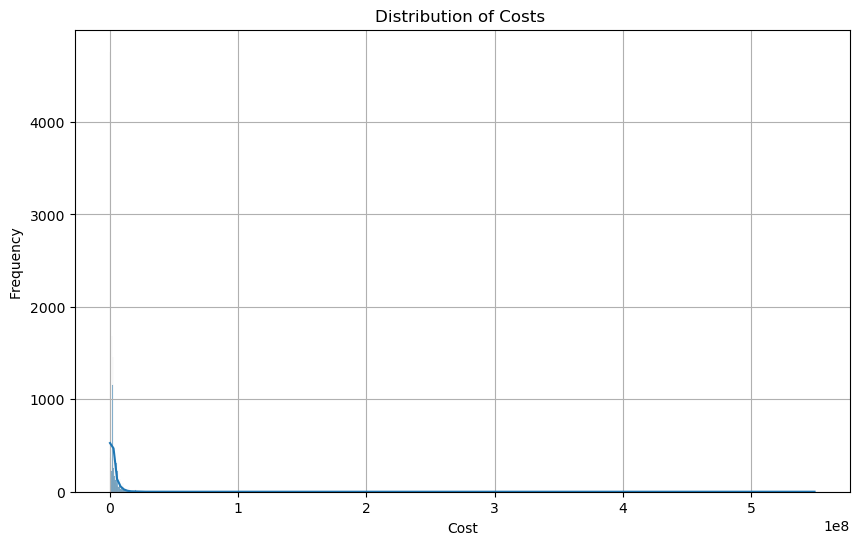

(15283, 111)


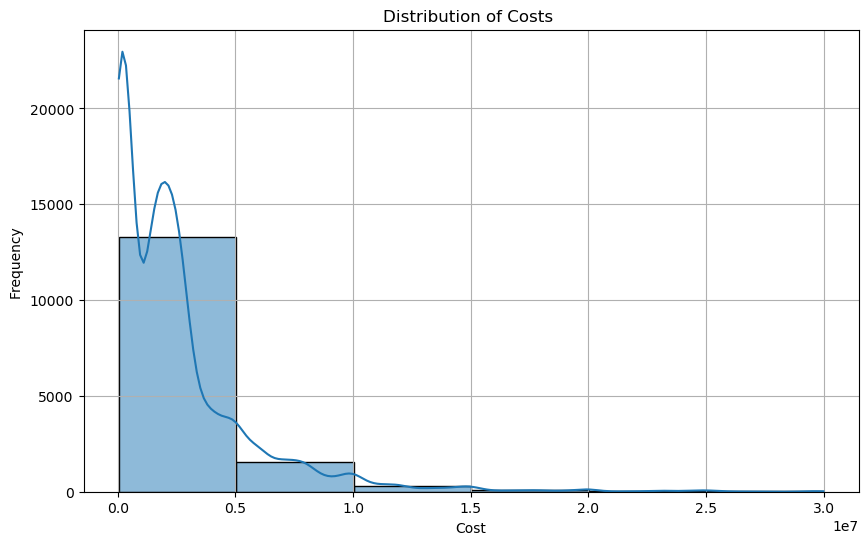

(13271, 111)


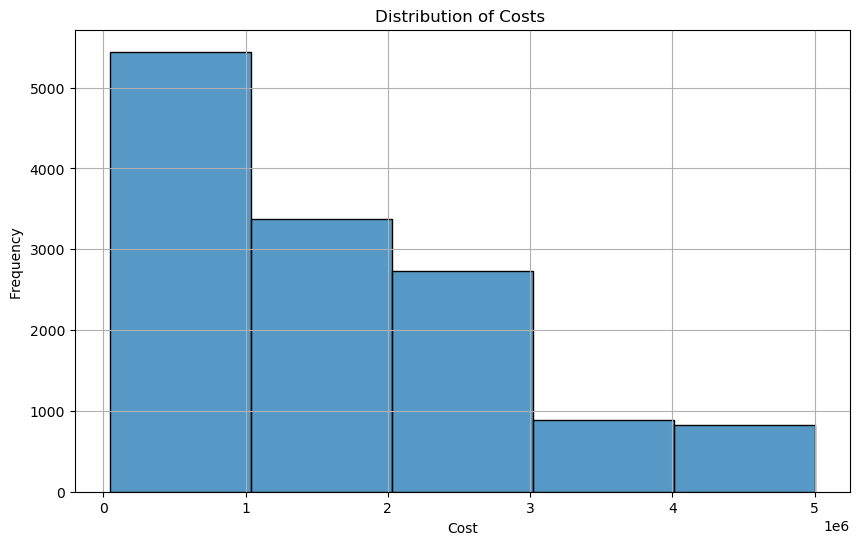

In [19]:
# Exploration of the final dataset

## Distribution ecMaxContribution
# Very high range, 46 594 to 549 442 000 
# Performed removal of outliers based on IQR method later
pd.set_option('display.float_format', '{:.2f}'.format)
print(fulldf["ecMaxContribution"].astype(int).describe())

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

# Only keep projects funding < 30 000 000 for now
# only 54 projects with funding > 30 000 000
# Biggest Majority of the projects have funding < 5000000
fulldf30 = fulldf[fulldf["ecMaxContribution"] < 30000000]
print(fulldf30.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf30['ecMaxContribution'], binwidth=5000000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

# Only keep projects funding < 5000000 for now
# Seems to be better for the ML training
fulldf5 = fulldf[fulldf["ecMaxContribution"] < 5000000]
print(fulldf5.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf5['ecMaxContribution'], binwidth=1000000)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

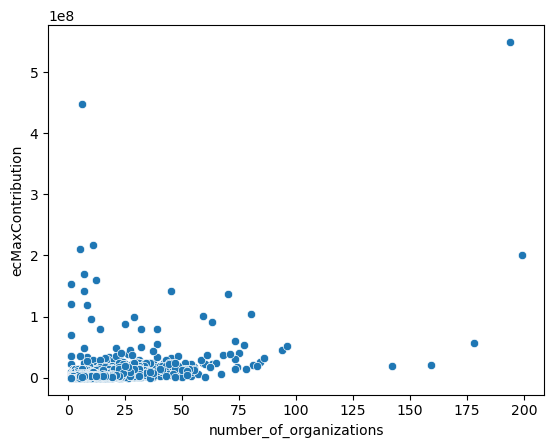

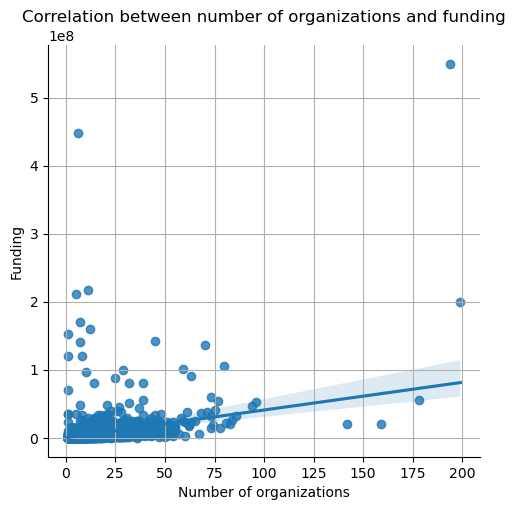

                         ecMaxContribution  number_of_organizations
ecMaxContribution                     1.00                     0.45
number_of_organizations               0.45                     1.00


In [20]:
# Exploration ecMaxContribution and number of organizations
sns.scatterplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number of organizations and funding")
plt.xlabel("Number of organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["ecMaxContribution", "number_of_organizations"]].corr())

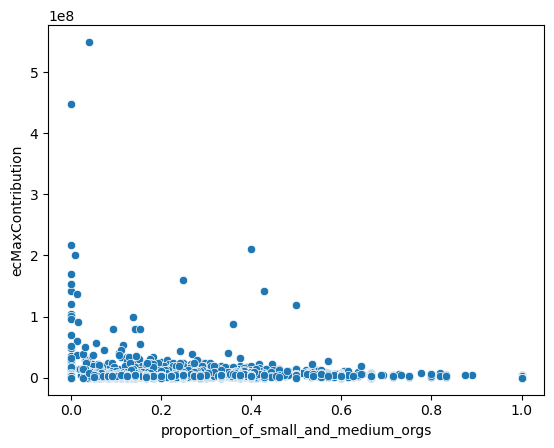

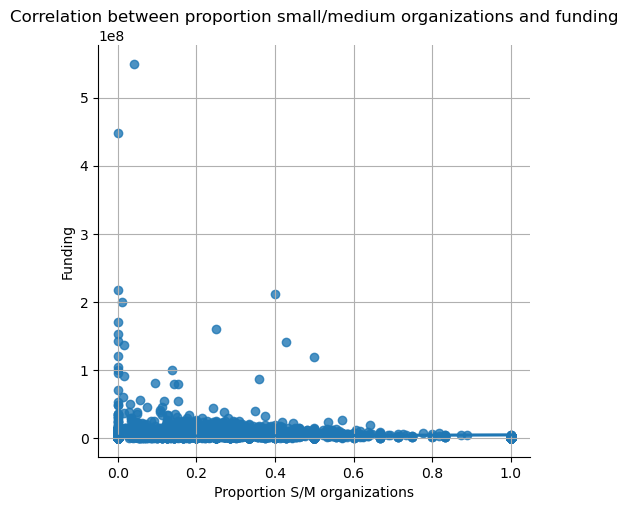

                                     proportion_of_small_and_medium_orgs  \
proportion_of_small_and_medium_orgs                                 1.00   
ecMaxContribution                                                   0.06   

                                     ecMaxContribution  
proportion_of_small_and_medium_orgs               0.06  
ecMaxContribution                                 1.00  


In [21]:
# Exploration proportion MSE and ecMaxContribution
sns.scatterplot(x="proportion_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="proportion_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between proportion small/medium organizations and funding")
plt.xlabel("Proportion S/M organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["proportion_of_small_and_medium_orgs", "ecMaxContribution"]].corr())

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None)


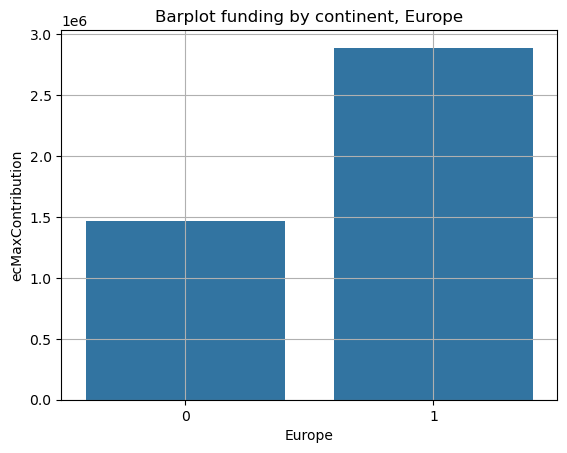

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None, estimator="median")


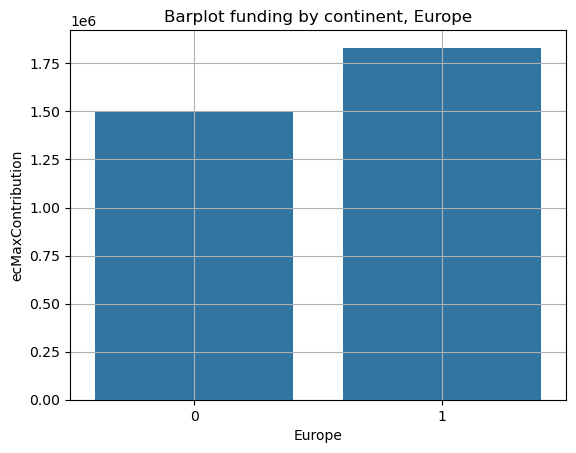

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None)


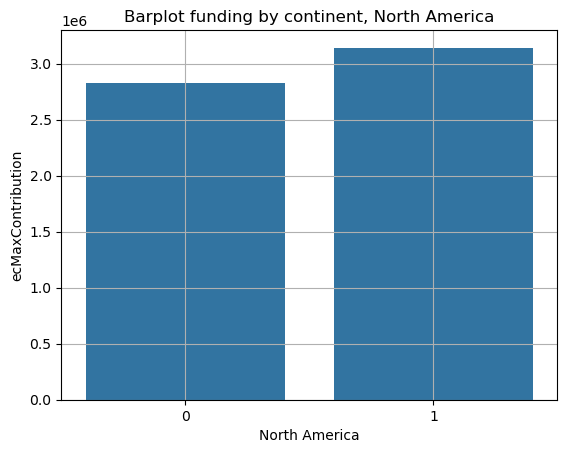

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None, estimator="median")


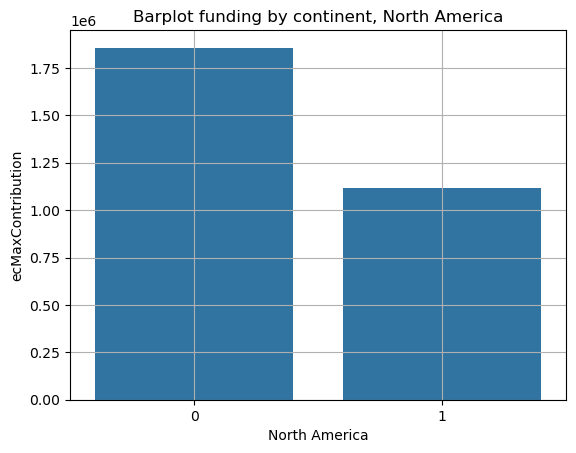

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None)


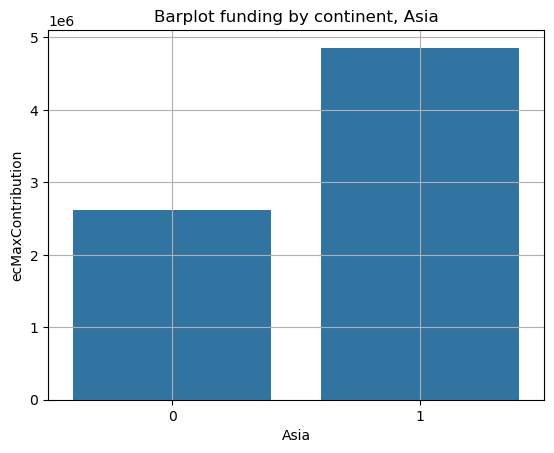

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None, estimator="median")


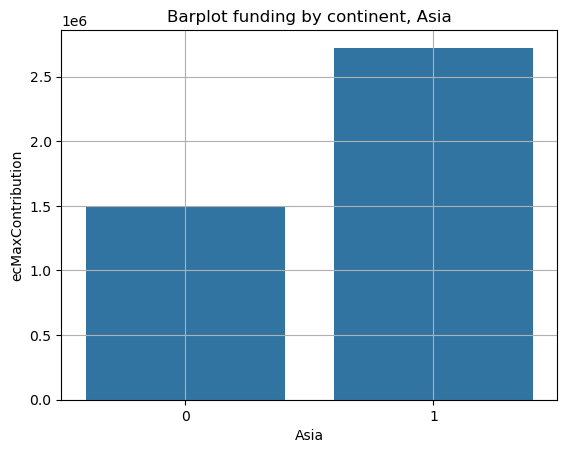

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None)


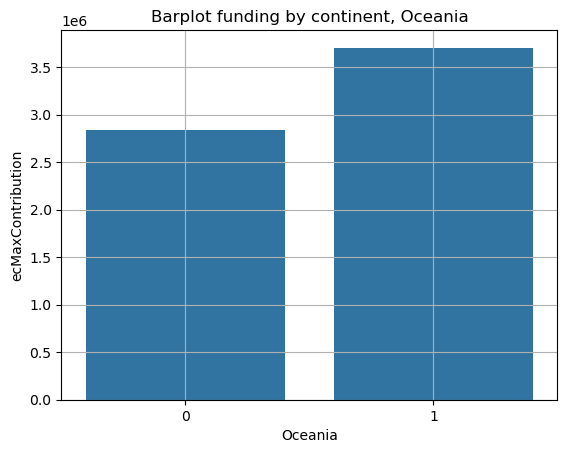

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None, estimator="median")


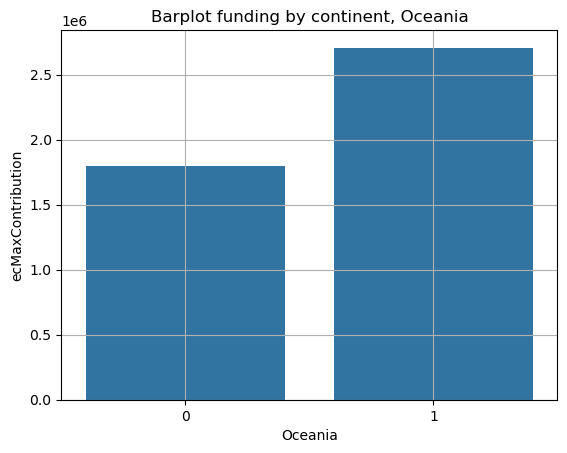

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None)


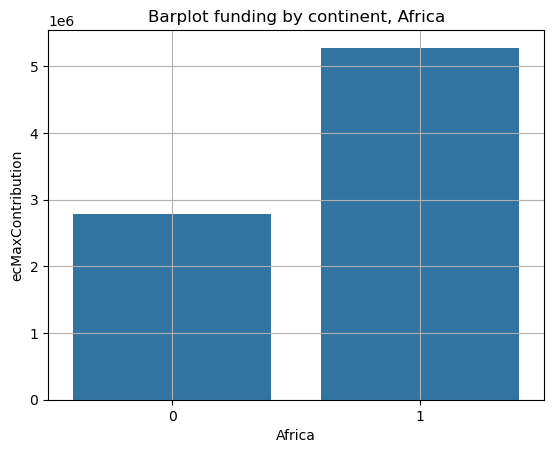

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None, estimator="median")


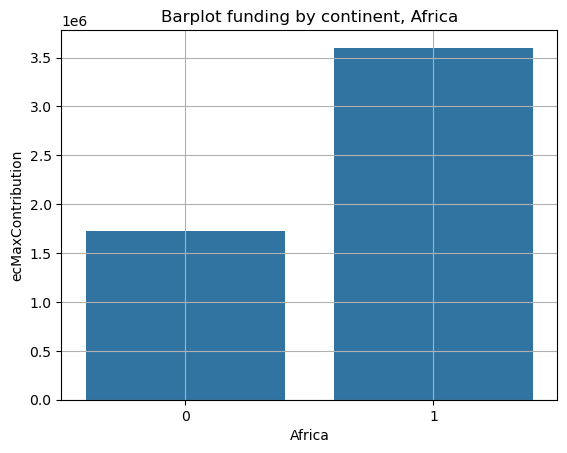

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None)


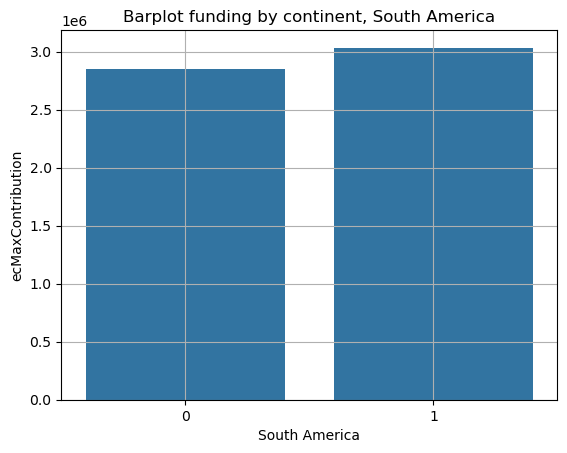

C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\489265850.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None, estimator="median")


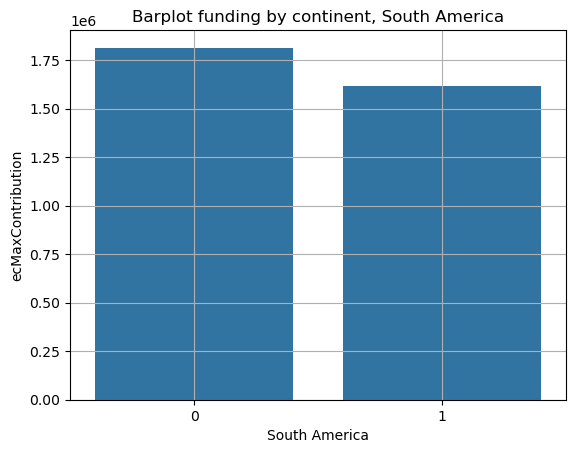

In [22]:
# Exploration continents and ecMaxContribution
## Europe
sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## North America
sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## Asia
sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## Ociania
sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## Africa
sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## South America
sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, South America")
plt.xlabel("South America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, South America")
plt.xlabel("South America")
plt.ylabel("ecMaxContribution")
plt.grid(True)

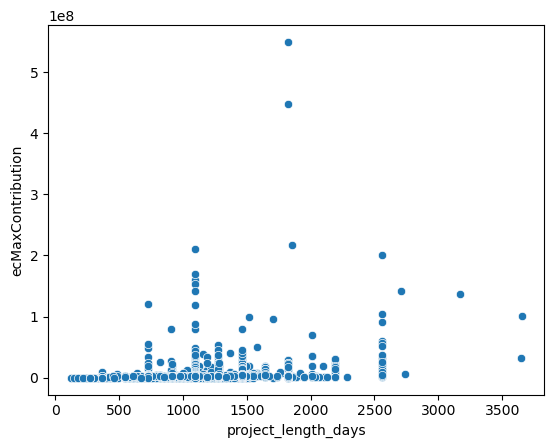

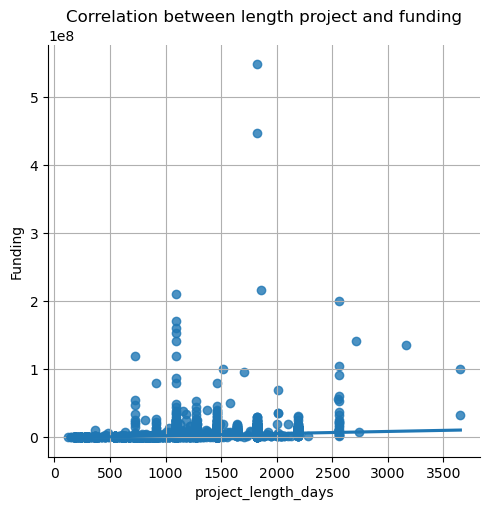

                     project_length_days  ecMaxContribution
project_length_days                 1.00               0.18
ecMaxContribution                   0.18               1.00


In [23]:
# Exploration length project and ecMaxContribution
sns.scatterplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between length project and funding")
plt.xlabel("project_length_days")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["project_length_days", "ecMaxContribution"]].corr())

## RandomForest

(15337, 111)
Lower treshold: -5364727.86, Upper treshold: 8576478.99
Remaining rows after outlier removal: 14547


C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\1943405831.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["log_ecMaxContribution"] = np.log(df_no_outliers["ecMaxContribution"])


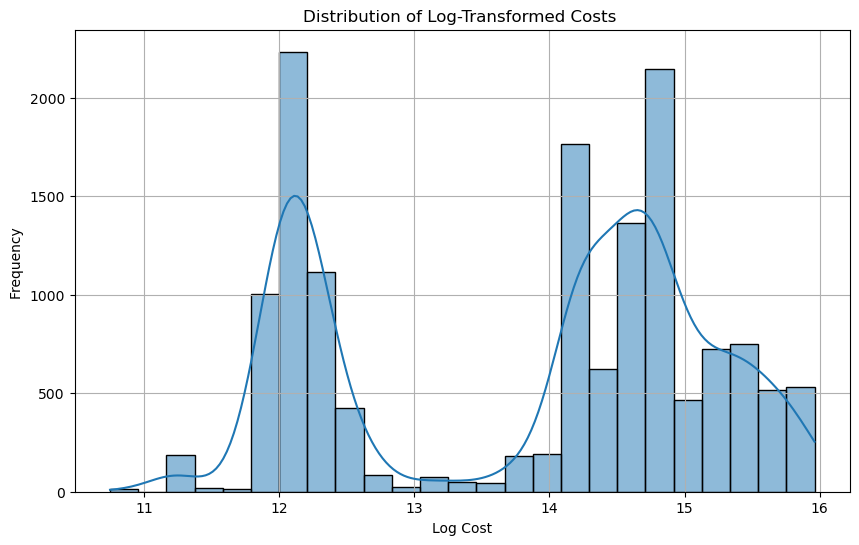

In [24]:
# Convert sustainability to boolean
fulldf["sustainability"] = fulldf["sustainability"].astype(bool)

## Perform IQR method to remove outliers in ecMaxContribution
## As it initially left out more than 1000 rows, we choose to use 2*IQR method instead of 1.5*IQR method
import numpy as np
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["ecMaxContribution"], 0.25) - 2*iqr 
upper_treshold = np.quantile(fulldf["ecMaxContribution"], 0.75) + 2*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["ecMaxContribution"]<lower_treshold) | (fulldf["ecMaxContribution"] > upper_treshold)]
df_no_outliers = fulldf[((fulldf["ecMaxContribution"]>lower_treshold) & (fulldf["ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

## Perform log transformation on the target variable
import numpy as np
df_no_outliers["log_ecMaxContribution"] = np.log(df_no_outliers["ecMaxContribution"])
# Check the distribution of the log-transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['log_ecMaxContribution'], kde=True)
plt.title("Distribution of Log-Transformed Costs ")
plt.xlabel("Log Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

Starting Bayesian Hyperparameter Tuning...


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


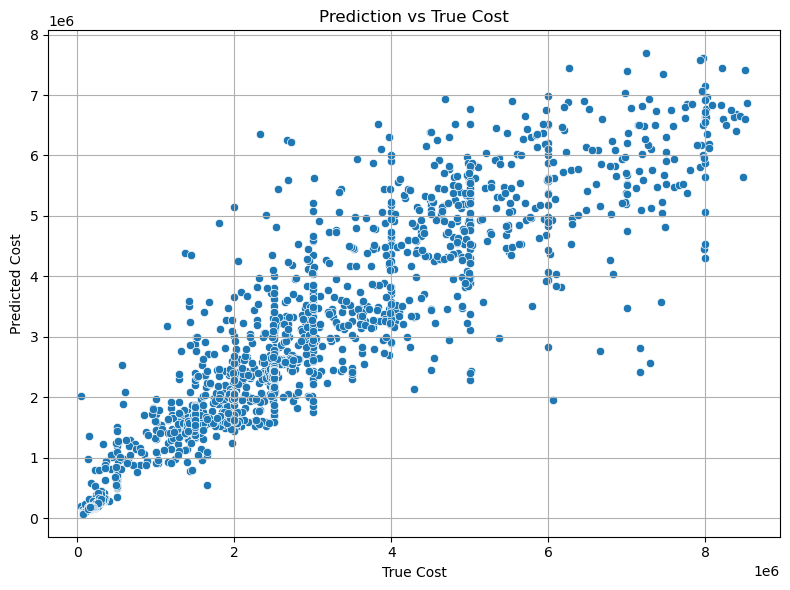

Correlation between True Cost and Predicted Cost: 0.94

Model components saved successfully!


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Assuming df_no_outliers, ordered_topic_cols, impact_columns, continents_columns are already defined
# and mlb_topics, mlb_impact, mlb_continents, infrequent_topic_columns are also available if needed for saving

X = df_no_outliers.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y = df_no_outliers["ecMaxContribution"]

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability', 'problem_type']
numerical_features = ['project_length_days', 'number_of_organizations', 'proportion_of_small_and_medium_orgs'] + ordered_topic_cols + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the search space for RandomForestRegressor
# These are common hyperparameters for RandomForestRegressor to tune
search_spaces_rf = {
    'n_estimators': Integer(50, 300),        # Number of trees in the forest
    'max_depth': Integer(3, 20),             # Maximum depth of the tree
    'min_samples_split': Integer(2, 20),     # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 10),      # Minimum number of samples required to be at a leaf node
    'max_features': Real(0.1, 1.0, prior='uniform'), # The number of features to consider when looking for the best split
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
}

# Set up BayesSearchCV for the Random Forest model
bayes_search_rf = BayesSearchCV(
    rf_model,
    search_spaces_rf,
    n_iter=40,  # Number of search iterations, you can adjust this
    scoring='neg_mean_squared_error', # Optimize for RMSE (by minimizing negative MSE)
    cv=5,        # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1    # Set to 1 or 2 for more detailed output during search
)

# Create a pipeline to combine preprocessing and Bayes Search for the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor_bayes_search', bayes_search_rf)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline (which includes fitting BayesSearchCV)
print("Starting Bayesian Hyperparameter Tuning...")
pipeline.fit(X_train, y_train)
print("Bayesian Hyperparameter Tuning Complete.")

# Access the best estimator and its parameters
best_rf_estimator = pipeline.named_steps['regressor_bayes_search'].best_estimator_
best_rf_params = pipeline.named_steps['regressor_bayes_search'].best_params_

print("\nBest parameters found by Bayes Search for Random Forest:")
print(best_rf_params)

print("Bayes Search Best CV score (neg_MSE):", pipeline.named_steps['regressor_bayes_search'].best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-pipeline.named_steps['regressor_bayes_search'].best_score_))

# Model Evaluation on the test set using the best estimator
y_pred = pipeline.predict(X_test) # Predict using the pipeline with the best tuned model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nTest Set Metrics (using best model from tuning):')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# --- Plotting and Correlation Calculation (MOVED HERE) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

# --- Save the trained components ---
# (The saving part remains largely the same, ensuring you save the pipeline with the tuned model)
# You would typically save the entire pipeline after tuning.
joblib.dump(pipeline, 'tuned_random_forest_prediction_pipeline.joblib')

# Similarly save the other components as before
# --- Save the final list of topic names for the UI ---
# This list now contains ALL topics that the model expects, including 'topic_other'
# We will remove the 'topic_' prefix for UI display
# First, get all topics and remove the 'topic_' prefix
raw_topics_for_ui = [col.replace('topic_', '') for col in ordered_topic_cols]
# Separate 'other' from the rest
topics_without_other = [topic for topic in raw_topics_for_ui if topic.lower() != 'other']
other_topic = [topic for topic in raw_topics_for_ui if topic.lower() == 'other']
# Sort the main topics alphabetically
sorted_topics = sorted(topics_without_other)
# Reconstruct the final list with 'other' at the end (ensure it's capitalized as you desire in UI)
if other_topic: # If 'other' was originally present
    final_ui_topics = sorted_topics + ['other'] # Using lowercase 'other' as loaded by `final_ui_topics.joblib`
else:
    final_ui_topics = sorted_topics
joblib.dump(final_ui_topics, 'final_ui_topics.joblib')


final_ui_impacts = sorted([col.replace('impact_', '') for col in impact_columns])
joblib.dump(final_ui_impacts, 'final_ui_impacts.joblib')

final_ui_continents = sorted([col.replace('continent_', '') for col in continents_columns])
joblib.dump(final_ui_continents, 'final_ui_continents.joblib')

# Assuming these are available from your feature engineering steps
# joblib.dump(mlb_topics, 'mlb_topics.joblib')
# joblib.dump(mlb_impact, 'mlb_impact.joblib')
# joblib.dump(mlb_continents, 'mlb_continents.joblib')
# joblib.dump(infrequent_topic_columns, 'infrequent_topics.joblib')
joblib.dump(X.columns.tolist(), 'feature_columns.joblib') # Save feature order
print("\nModel components saved successfully!")


--- Feature Importance ---
                                          Feature  Importance
1                    num__number_of_organizations        0.36
0                        num__project_length_days        0.20
2        num__proportion_of_small_and_medium_orgs        0.08
106                   cat__legalBasis_HORIZON.1.2        0.07
145                cat__fundingScheme_HORIZON-RIA        0.04
235                                 remainder__id        0.03
132                cat__fundingScheme_HORIZON-CSA        0.02
140                 cat__fundingScheme_HORIZON-IA        0.02
114                   cat__legalBasis_HORIZON.3.1        0.02
151     cat__fundingScheme_HORIZON-TMA-MSCA-PF-EF        0.01
153        cat__fundingScheme_HORIZON-TMA-MSCA-SE        0.01
108                   cat__legalBasis_HORIZON.2.1        0.01
109                   cat__legalBasis_HORIZON.2.2        0.01
139            cat__fundingScheme_HORIZON-ERC-SYG        0.01
111                   cat__legalBasis_HORI

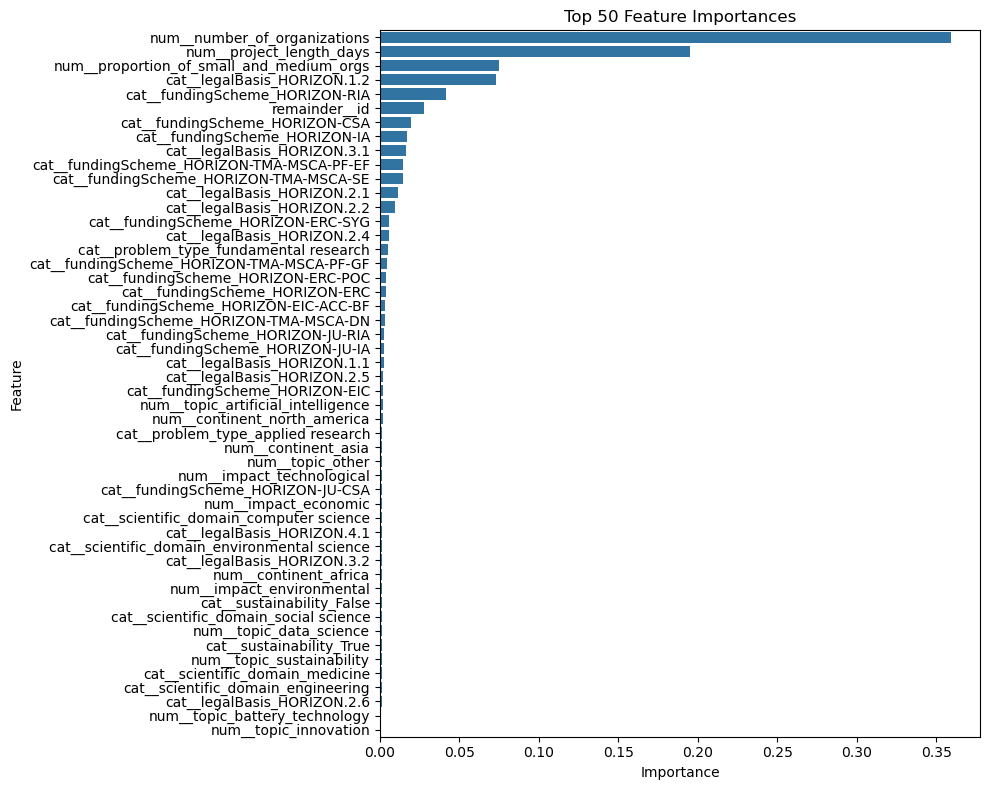

In [28]:
# --- Feature Importance Analysis ---
print("\n--- Feature Importance ---")

# 1. Get the trained regressor from the pipeline
# The regressor is the 'best_estimator_' found by BayesSearchCV
# The step name is 'regressor_bayes_search'
trained_regressor = pipeline.named_steps['regressor_bayes_search'].best_estimator_

# 2. Get the feature importances
importances = trained_regressor.feature_importances_

# 3. Get the feature names after preprocessing
preprocessor = pipeline.named_steps['preprocessor']

# Get the names of all features that the preprocessor outputs
# This correctly combines numerical features and the one-hot encoded categorical features
# You should use get_feature_names_out() on the preprocessor itself,
# and it automatically handles the different transformers.
all_feature_names = preprocessor.get_feature_names_out()

# Create a Series for easier viewing
import pandas as pd # Ensure pandas is imported if not already globally
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print top 50 most important features (as your plot uses 50)
print(feature_importance_df.head(50))

# visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# Use .head(50) to plot only the top 50 features as intended by your comment
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 50 Feature Importances') # Adjusted title to reflect top 50
plt.tight_layout()
plt.show()

feature_importance_df.to_csv("feature_importance.csv", index=False)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Assuming df_no_outliers, ordered_topic_cols, impact_columns, continents_columns are already defined
# and mlb_topics, mlb_impact, mlb_continents, infrequent_topic_columns are also available if needed for saving

# Separate features (X) and log-transformed target (y_log)
X = df_no_outliers.drop(columns=["ecMaxContribution", "log_ecMaxContribution"])
y_log = df_no_outliers["log_ecMaxContribution"] # y is on the log scale
y_original = df_no_outliers["ecMaxContribution"] # Keep original for backtransformation evaluation

# Identify categorical and numerical features
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability', 'problem_type']
numerical_features = ['project_length_days', 'number_of_organizations', 'proportion_of_small_and_medium_orgs'] + ordered_topic_cols + impact_columns + continents_columns

# Data Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the search space for RandomForestRegressor
# These are common hyperparameters for RandomForestRegressor to tune
search_spaces_rf = {
    'n_estimators': Integer(50, 300),        # Number of trees in the forest
    'max_depth': Integer(3, 20),             # Maximum depth of the tree
    'min_samples_split': Integer(2, 20),     # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 10),      # Minimum number of samples required to be at a leaf node
    'max_features': Real(0.1, 1.0, prior='log-uniform'), # The number of features to consider when looking for the best split
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
}

# Set up BayesSearchCV for the Random Forest model
bayes_search_rf = BayesSearchCV(
    rf_model,
    search_spaces_rf,
    n_iter=40,  # Number of search iterations, you can adjust this
    scoring='neg_mean_squared_error', # Optimize for RMSE (by minimizing negative MSE)
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1   # Set to 1 or 2 for more detailed output during search
)

# Create a pipeline to combine preprocessing and Bayes Search for the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor_bayes_search', bayes_search_rf)])

# Split data into training and testing sets
X_train, X_test, y_train_log, y_test_log, y_train_original, y_test_original = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42
)

# Train the pipeline (which includes fitting BayesSearchCV)
print("Starting Bayesian Hyperparameter Tuning...")
pipeline.fit(X_train, y_train_log)
print("Bayesian Hyperparameter Tuning Complete.")

# Access the best estimator and its parameters
best_rf_estimator = pipeline.named_steps['regressor_bayes_search'].best_estimator_
best_rf_params = pipeline.named_steps['regressor_bayes_search'].best_params_

print("\nBest parameters found by Bayes Search for Random Forest:")
print(best_rf_params)

print("Bayes Search Best CV score (neg_MSE):", pipeline.named_steps['regressor_bayes_search'].best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-pipeline.named_steps['regressor_bayes_search'].best_score_))

# Model Evaluation on the test set using the best estimator
y_pred_log = pipeline.predict(X_test) # Predict using the pipeline with the best tuned model

mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("--- Evaluation on LOG Scale ---")
print(f'Mean Squared Error (Log): {mse_log:.4f}')
print(f'Root Mean Squared Error (Log): {rmse_log:.4f}')
print(f'R-squared (Log): {r2_log:.4f}')

# --- Backtransform predictions to original scale ---
y_pred_original_scale = np.exp(y_pred_log) # Using np.exp() for inverse log transformation

# Model Evaluation on ORIGINAL scale
mse_original = mean_squared_error(y_test_original, y_pred_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original_scale)
mae_original = mean_absolute_error(y_test_original, y_pred_original_scale) # MAE is often more interpretable on backtransformed scale

print("\n--- Evaluation on ORIGINAL Scale (Backtransformed) ---")
print(f'Mean Squared Error (Original): {mse_original:.2f}')
print(f'Root Mean Squared Error (Original): {rmse_original:.2f}')
print(f'Mean Absolute Error (Original): {mae_original:.2f}') # Consider MAE as well
print(f'R-squared (Original): {r2_original:.2f}')

Starting Bayesian Hyperparameter Tuning...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## XGBoost

(15337, 111)
Lower treshold: -5364727.86, Upper treshold: 8576478.99
Remaining rows after outlier removal: 14547


C:\Users\lieve\AppData\Local\Temp\ipykernel_23560\4096469616.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["log_ecMaxContribution"] = np.log(df_no_outliers["ecMaxContribution"])


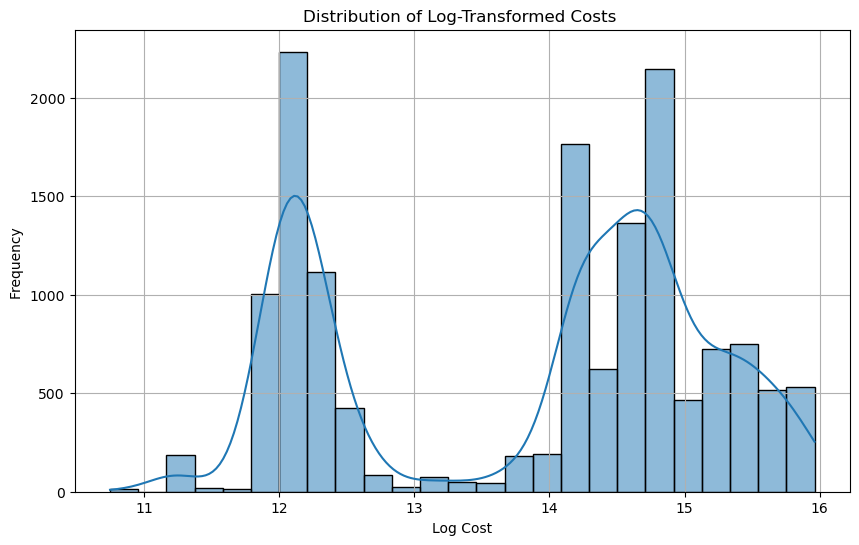

In [30]:
# Preparation XGboost model training on log-transformed target variable (due to high skewness)

# Convert sustainability to boolean
fulldf["sustainability"] = fulldf["sustainability"].astype(bool)

## Perform IQR method to remove outliers in ecMaxContribution
## As it initially left out more than 1000 rows, we choose to use 2*IQR method instead of 1.5*IQR method
import numpy as np
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["ecMaxContribution"], 0.25) - 2*iqr 
upper_treshold = np.quantile(fulldf["ecMaxContribution"], 0.75) + 2*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["ecMaxContribution"]<lower_treshold) | (fulldf["ecMaxContribution"] > upper_treshold)]
df_no_outliers = fulldf[((fulldf["ecMaxContribution"]>lower_treshold) & (fulldf["ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

## Perform log transformation on the target variable
import numpy as np
df_no_outliers["log_ecMaxContribution"] = np.log(df_no_outliers["ecMaxContribution"])
# Check the distribution of the log-transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['log_ecMaxContribution'], kde=True)
plt.title("Distribution of Log-Transformed Costs ")
plt.xlabel("Log Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

In [34]:
# XGBoost model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["log_ecMaxContribution"]

# Data Preprocessing using ColumnTransformer
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability', 'problem_type']
numerical_features = ['project_length_days', 'number_of_organizations', "proportion_of_small_and_medium_orgs"] + ordered_topic_cols + impact_columns + continents_columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42, enable_categorical=True),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=40,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor_bayes_search', bayes_search)])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipeline.fit(X_train, y_train)
bayes_best = pipeline.named_steps['regressor_bayes_search'].best_estimator_
best_params_found = pipeline.named_steps['regressor_bayes_search'].best_params_
print("Best parameters found by Bayes Search:")
print(best_params_found)

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

pipeline_preds_log = pipeline.predict(X_test)
# Inverse the log transformation to get the original scale
pipeline_preds = np.exp(pipeline_preds_log)
# Inverse the log transformation to get the original scale for y_test
y_test_exp = np.exp(y_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, pipeline_preds)
bayes_mse = mean_squared_error(y_test_exp, pipeline_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best parameters found by Bayes Search:
OrderedDict({'colsample_bytree': 0.650579654107462, 'gamma': 0.07861144493396041, 'learning_rate': 0.047832810359276515, 'max_depth': 9, 'n_estimators': 196, 'reg_alpha': 0.5618832370386845, 'reg_lambda': 0.29401996882285314, 'subsample': 0.8156890154940972})
Bayes Search Best CV score (neg_MSE): -0.05393936560342936
Bayes Search Best CV score (RMSE): 0.23224849967960903
Bayes Search Test MAE: 329266.49914060347
Bayes Search Test MSE: 430694244712.3383
Bayes Search Test RMSE: 656272.995568413


\\?\C:\Users\lieve\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


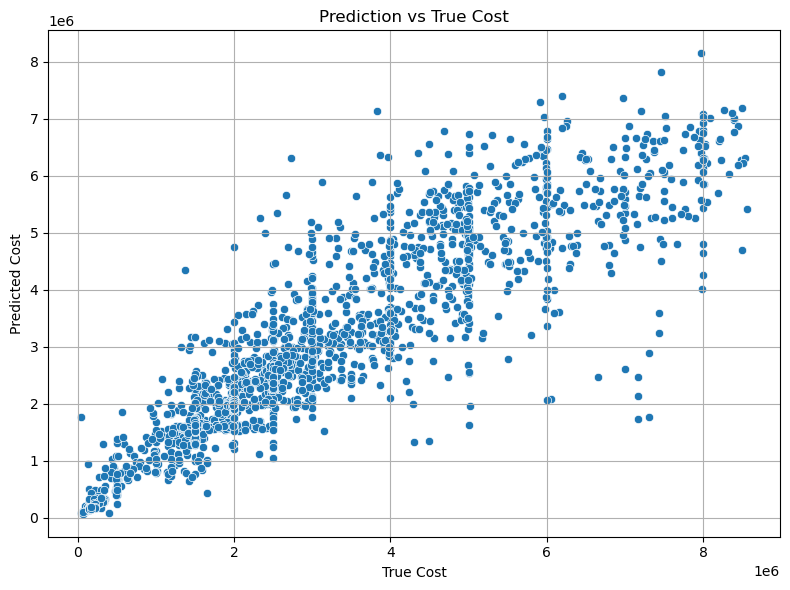

Correlation between True Cost and Predicted Cost: 0.88


In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=pipeline_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, pipeline_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")



                                       Feature  Importance
151  cat__fundingScheme_HORIZON-TMA-MSCA-PF-EF        0.18
137             cat__fundingScheme_HORIZON-ERC        0.08
0                     num__project_length_days        0.07
138         cat__fundingScheme_HORIZON-ERC-POC        0.07
135      cat__fundingScheme_HORIZON-EIC-ACC-BF        0.07
..                                         ...         ...
206        cat__scientific_domain_microbiology        0.00
220            cat__scientific_domain_robotics        0.00
222           cat__scientific_domain_sociology        0.00
228                 cat__scientific_domain_nan        0.00
232             cat__problem_type_confidential        0.00

[236 rows x 2 columns]


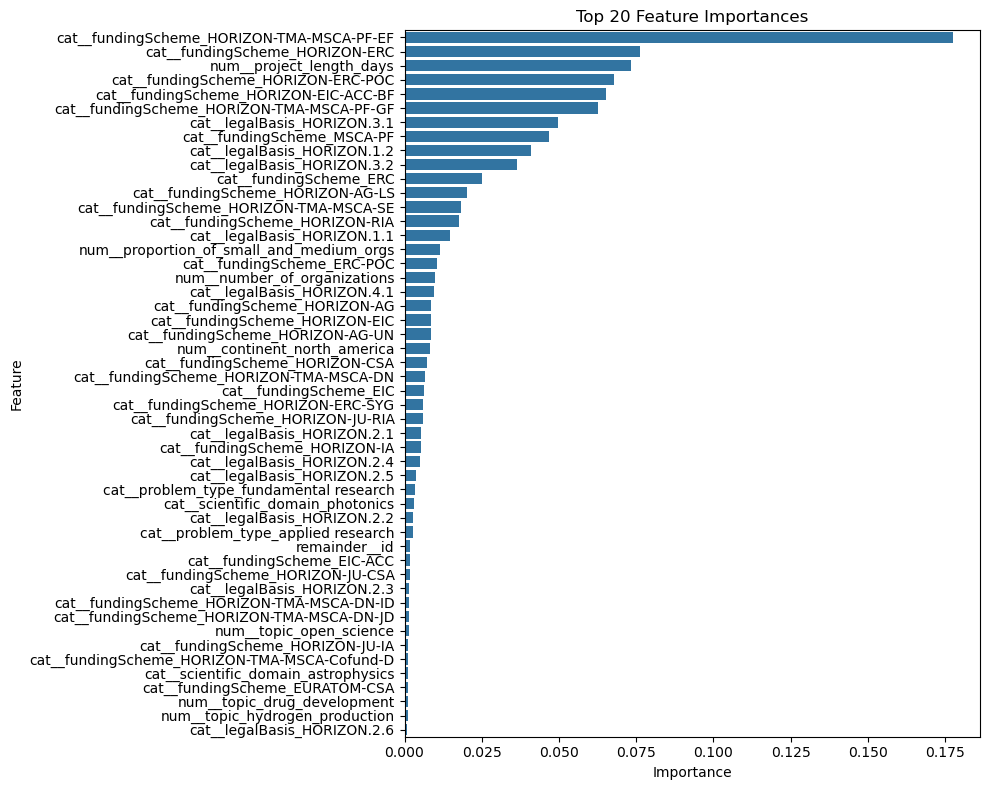

In [36]:
trained_regressor = pipeline.named_steps['regressor_bayes_search'].best_estimator_

# Get the feature importances
importances = trained_regressor.feature_importances_

# Get the feature names after preprocessing
# This requires inspecting the ColumnTransformer's output features
preprocessor = pipeline.named_steps['preprocessor']

# Get names of numerical features (these remain the same after StandardScaler)
num_features_out = numerical_features

# Get names of one-hot encoded categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names in the order they are presented to the regressor
all_feature_names = list(preprocessor.get_feature_names_out())


# Create a Series for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df) # Print top 10 most important features

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

feature_importance_df.to_csv("feature_importance.csv", index=False)

